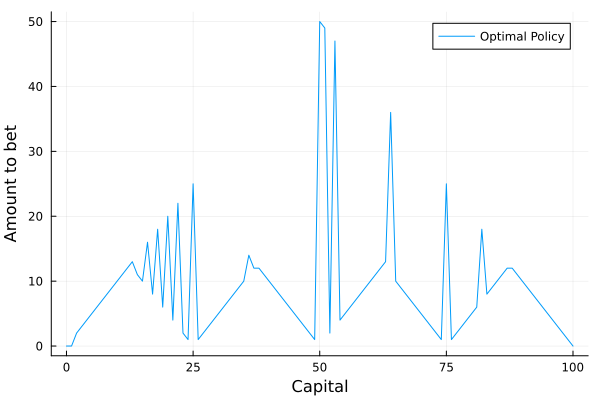

In [2]:
using Plots

# Define states
S = collect(0:100)  # States from 0 to 100, where 0 and 100 are terminal states

# Value iteration for the gambler's problem
function value_iteration(V, π, ph)
    γ = 1.0    # Discount factor
    θ = 1e-6   # Tolerance for convergence
    while true
        δ = 0.0
        for s in 2:99  #0 and 100 are terminal, skip iterating over those
            v = V[s + 1]  # Current val of state s
            max_val = -Inf
            best_a = 0 #initialize the best bet amount
            for a in 1:s  # iterate through all possibilities, can only bet up to s (your bankroll)
                win = min(s + a, 100)  # win, move to state s + a (can't exceed 100)
                lose = max(s - a, 0)   # lose, move to state s - a (can't go below 0)
                val = ph * (γ * V[win+1]) + (1 - ph) * (γ * V[lose+1])
                if val > max_val
                    max_val = val #store the max value
                    best_a = a  # Store the best bet amount
                end
            end
            V[s+1] = max_val #update value for state
            π[s+1] = best_a #update policy for state
            δ = max(δ, abs(v - V[s+1]))
        end
        if δ < θ
            break
        end
    end

    return V, π
end

π = zeros(length(S))
V = zeros(length(S))  # Initial value function
V[101] = 1
ph = 0.4
V, π = value_iteration(V, π, ph)
plot(S, V, xlabel="Capital", ylabel="Value estimates", label="Value Function")
plot(S, π, xlabel="Capital", ylabel="Amount to bet", label="Optimal Policy")


As shown above, my chart differs at a few different places. At 51 capital, it recommends betting 49 of the capital. This differs from the 4.3 figure, which recommends 1. This is because our terminal states are 0 and 100, so at 51 capital, our dynamic algorithm wants to reach the terminal state at 100, and will optimize itself for the highest future expected value, weighing in the chance to lose (0.6)